### Загружаем данные

* Данные по кампаниям за 1 год
* **5369** кампаний
* **64** параметра
* Параметры рассчитывались за **0,1,2 и 3 дни** жизни пользователя
* Нужно прогнозировать **CARPU 60 дня**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data_campaigns.csv',delimiter =',')
data.head()

,campaign,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,y_target
0,campaign_1,1,100.0,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,campaign_2,55,100.0,43.636364,36.363636,25.454545,5.454545,5.454545,0.000000,0.000000,...,0.000000,0.0,0.500000,0.50000,NaN,NaN,NaN,0.396790,0.603210,0.597262
2,campaign_3,2,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,campaign_4,1,100.0,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,campaign_5,1914,100.0,40.282132,28.578892,23.406479,5.485893,2.664577,1.358412,0.992685,...,0.144828,0.0,0.434483,0.37931,0.07577,0.097053,NaN,0.168979,0.244427,4.227254


In [2]:
data.describe()

,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,y_target
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5350.000000,5356.000000,5357.000000,5356.000000,5350.000000,...,2988.000000,2988.000000,2988.000000,2988.000000,2393.000000,1865.000000,612.000000,2354.000000,2042.000000,5348.000000
mean,501.076923,99.006334,52.203761,42.280531,37.181500,9.568028,6.899212,4.434975,3.793060,1.262112,...,0.240958,0.029237,0.482498,0.332521,0.210539,0.710116,0.528543,0.503164,0.739247,19.097340
std,4969.552759,5.893983,33.571364,34.210039,33.737565,20.963044,18.577328,15.444024,14.821945,8.390525,...,0.300077,0.128274,0.336474,0.310216,0.270936,2.222838,0.792517,0.437443,0.815691,93.526737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000805,0.001004,0.002217,-0.316806,0.008884,0.000000
25%,1.000000,100.000000,33.333333,19.047619,5.594406,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.258398,0.000000,0.054321,0.104806,0.032339,0.149565,0.206643,0.000000
50%,4.000000,100.000000,50.000000,33.653846,28.318584,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.497979,0.333333,0.116375,0.256306,0.242100,0.373381,0.373853,1.061218
75%,28.000000,100.000000,80.000000,66.666667,50.000000,8.676912,4.168277,1.470588,0.861362,0.595366,...,0.333333,0.000000,0.666667,0.500000,0.221905,0.893370,0.692674,0.757301,1.033973,7.030581
max,246660.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,283.195203,...,1.000000,1.000000,1.000000,1.000000,2.000000,60.431226,6.936952,3.891952,7.173030,2469.751895


In [3]:
# Исключим мелкие когорты (< 75 квантили)(А что будет, если не будем исключать?)
cohort_size=data["size"].quantile(0.75)
data=data[data['size']>=cohort_size].reset_index(drop=True)
data.describe()

,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,y_target
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,...,1301.000000,1301.000000,1301.000000,1301.000000,1164.000000,1054.000000,369.000000,1189.000000,1117.000000,1355.000000
mean,1972.141697,99.665581,44.054658,32.013730,26.833951,6.441682,3.755424,1.952764,1.401230,0.633521,...,0.220575,0.019353,0.475927,0.345374,0.133150,0.604332,0.445744,0.427854,0.680958,7.124517
std,9747.489177,3.692497,8.797163,9.105907,9.164421,4.447934,2.920268,1.921688,1.509704,1.003189,...,0.203739,0.070697,0.235078,0.218970,0.151262,2.066659,0.733614,0.380475,0.752754,18.113747
min,28.000000,6.598407,3.981797,4.095563,2.730375,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000805,0.001004,0.002217,0.008556,0.008884,0.000000
25%,66.000000,100.000000,39.028120,26.690398,21.428571,3.281135,1.899937,0.679368,0.276148,0.221509,...,0.105263,0.000000,0.375000,0.244444,0.050086,0.092361,0.023030,0.133350,0.196063,1.670977
50%,217.000000,100.000000,43.434343,30.974478,25.389551,5.797101,3.225806,1.538462,1.041667,0.442102,...,0.195122,0.000000,0.478632,0.347170,0.091939,0.188878,0.186442,0.271590,0.301122,4.057588
75%,998.000000,100.000000,48.304858,35.481456,30.082667,8.823529,5.000000,2.713568,1.987768,0.743433,...,0.272727,0.007143,0.583333,0.444444,0.160871,0.694717,0.518572,0.670444,1.003759,7.517178
max,246660.000000,100.000000,81.250000,83.333333,79.166667,28.571429,20.000000,16.129032,12.500000,26.488802,...,1.000000,1.000000,1.000000,1.000000,1.000000,60.431226,6.936952,3.045386,5.612520,385.092378


### (!) Пропущенные значения

In [4]:
#Сколько у нас пропущенных значений?
missing = (data.isnull().sum() / len(data)) * 100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing = pd.DataFrame({'Missing Ratio': missing})
missing.head(20)

,Missing Ratio
feature_61,72.767528
feature_60,22.214022
feature_63,17.564576
feature_59,14.095941
feature_62,12.250923
feature_58,3.985240
feature_57,3.985240
feature_56,3.985240
feature_55,3.985240
feature_54,3.985240


In [5]:
# Заполним пропущенные значения и проверим
data.fillna(0, inplace = True)

missing = (data.isnull().sum() / len(data)) * 100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing = pd.DataFrame({'Missing Ratio': missing})
missing.head()

,Missing Ratio


In [6]:
# Зададим X и y
X = data.iloc[:,1:65]
y = data['y_target']
y.describe()

count    1355.000000
mean        7.124517
std        18.113747
min         0.000000
25%         1.670977
50%         4.057588
75%         7.517178
max       385.092378
Name: y_target, dtype: float64

In [7]:
X

,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,55,100.000000,43.636364,36.363636,25.454545,5.454545,5.454545,0.000000,0.000000,0.262496,...,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.396790,0.603210
1,1914,100.000000,40.282132,28.578892,23.406479,5.485893,2.664577,1.358412,0.992685,0.331490,...,0.496552,0.144828,0.000000,0.434483,0.379310,0.075770,0.097053,0.000000,0.168979,0.244427
2,166,100.000000,43.373494,27.108434,25.301205,3.012048,3.012048,0.602410,1.204819,0.194616,...,0.600000,0.100000,0.000000,0.400000,0.400000,0.087164,0.014902,0.000000,0.142365,0.271526
3,135,98.518519,37.037037,26.666667,21.481481,2.962963,2.222222,0.740741,0.740741,0.121676,...,0.571429,0.142857,0.000000,0.428571,0.142857,0.123444,0.033156,0.000000,0.227087,0.139870
4,41235,100.000000,47.765248,34.509519,28.846853,3.838972,2.362071,1.098581,0.860919,0.283213,...,0.461957,0.153846,0.005017,0.500836,0.338629,0.046138,0.078411,0.011102,0.136023,0.180906
5,136,100.000000,36.029412,25.000000,19.117647,4.411765,1.470588,1.470588,0.735294,0.359990,...,0.428571,0.000000,0.000000,0.142857,0.285714,0.217928,0.000000,0.000000,0.181779,0.343723
6,54,100.000000,37.037037,24.074074,24.074074,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,132,100.000000,43.939394,31.060606,24.242424,22.727273,12.878788,2.272727,3.030303,1.845454,...,0.425000,0.250000,0.000000,0.400000,0.500000,0.051205,0.167169,0.000000,0.120482,0.262048
8,218,99.082569,50.458716,44.495413,39.449541,4.128440,5.963303,1.834862,2.752294,0.459856,...,0.347826,0.173913,0.000000,0.434783,0.043478,0.029233,0.063510,0.000000,0.182765,0.008884
9,340,99.705882,60.294118,47.941176,40.588235,5.882353,3.823529,1.470588,0.882353,0.653275,...,0.172414,0.137931,0.000000,0.586207,0.482759,0.017929,0.099571,0.000000,0.149065,0.380779


### (!) Нормализация (трансформация Бокса-Кокса), коэффициент асимметрии и логарифмирование

In [7]:
# Нормализуем X трансформацией Бокса-Кокса
from scipy.special import boxcox1p
from scipy.stats import skew #коэф ассиметрии
import numpy as np

numeric_feats = X.dtypes[X.dtypes!="object"].index
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew':skewed_feats}) 
skewness = skewness[abs(skewness)>0.2]
skewed_features = skewness.index
lam=0.04
for feat in skewed_features:
    X[feat] = boxcox1p(X[feat],lam)

# Логарифмируем target и смотрим коэффициент асимметрии. Для реальных результатов незабываем потенциировать
y_n=boxcox1p(y,0)
print("Коэффициент ассиметрии y до транфсормации – %s, b и после – %s"% (skew(y),skew(y_n)))


Коэффициент ассиметрии y до транфсормации – 14.182414244808843, b и после – 0.44633298198617233


In [8]:
y_n.describe()

count    1355.000000
mean        1.602629
std         0.888931
min         0.000000
25%         0.982444
50%         1.620890
75%         2.142080
max         5.956077
Name: y_target, dtype: float64

### (!) Robust и Standard Scaling

In [9]:
# Масштабируем с Robust Scaler-ом (median/IQR, а не mean/variance)
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
names = list(X.columns)
X= sc.fit_transform(X)
X = pd.DataFrame(data=X, columns=names)
X.fillna(0, inplace = True)

In [10]:
X.head()

,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,-0.485996,0.000000,0.021765,0.566820,0.007538,-0.062311,0.587825,-1.152975,-0.828625,-0.372696,...,-2.294327,-1.082122,0.000000,0.118059,0.670126,-0.681238,-0.298588,0.000000,0.371532,0.555371
1,0.834038,0.000000,-0.352499,-0.282078,-0.239019,-0.056478,-0.195525,-0.092627,-0.028581,-0.223846,...,-0.013128,-0.216142,0.000000,-0.172046,0.188700,-0.004733,-0.051651,0.000000,-0.091894,-0.004833
2,-0.097388,0.000000,-0.006574,-0.466298,-0.010276,-0.629251,-0.071354,-0.574766,0.090670,-0.526970,...,0.368637,-0.472375,0.000000,-0.329883,0.274033,0.093016,-0.259216,0.000000,-0.151597,0.042585
3,-0.171721,-0.017767,-0.743478,-0.523452,-0.489586,-0.643786,-0.371084,-0.472096,-0.187173,-0.702417,...,0.265621,-0.227201,0.000000,-0.198843,-0.884750,0.397839,-0.211734,0.000000,0.034048,-0.197582
4,2.142870,0.000000,0.447029,0.381214,0.378198,-0.407091,-0.313203,-0.239032,-0.108954,-0.327196,...,-0.146471,-0.165758,0.816894,0.121682,0.017266,-0.263683,-0.097409,1.460042,-0.166022,-0.119985


### Перейдем к моделированию
* **(!) Модель:** Будем использовать Ridge regression
* **(!) Кросс-валидация**: алгоритм ShuffleSplit
* **Работа с параметрами:** Pearson score, RFECV
* **Регуляризация**. Посмотрим как выбирается параметр Alpha
* **Learning Curve**: Посмотрим как ведет себя модель на обучающей и валидирующей выборках
* **Residuals Plot**: Посмотрим как ведут себя остатки (разница между реальным и пронозным значениями)
* **Prediction Error Plot**: Сравним прогнозные результаты модели с ее реальными значениями

In [11]:
from sklearn.linear_model import  RidgeCV
from sklearn.model_selection import ShuffleSplit, train_test_split


cv=ShuffleSplit(n_splits=10,train_size=0.8,test_size=0.2,random_state= 2019)
alphas = np.logspace(-4, 1, 50)
regressor = RidgeCV(alphas=alphas)

### (!) Смотрим R2 и MSE + yellowbrick framework

In [12]:
import matplotlib.pyplot as plt
from yellowbrick.model_selection import CVScores

_, ax = plt.subplots(figsize=(10,10))
r2 = CVScores(regressor,ax=ax,cv=cv,scoring='r2')
r2.fit(X,y_n)
r2.poof()

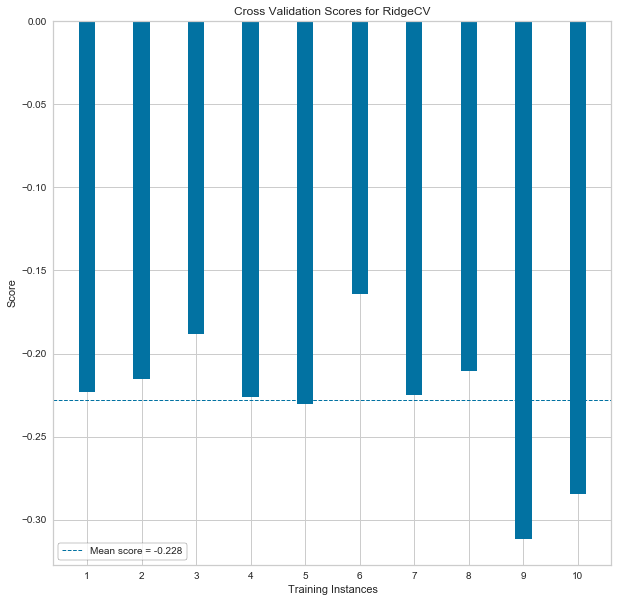

In [13]:
_, ax = plt.subplots(figsize=(10,10))
mse = CVScores(regressor,ax=ax,cv=cv,scoring='neg_mean_squared_error')
mse.fit(X,y_n)
mse.poof()

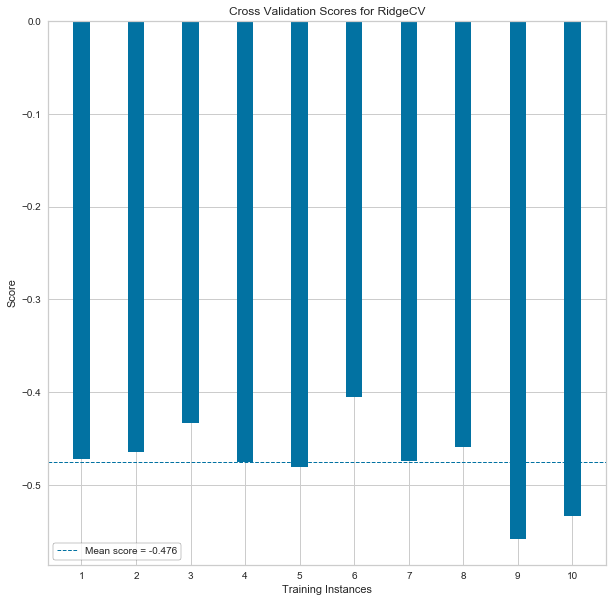

In [14]:
# посмотрим как ведет себя RMSE
from sklearn.metrics import make_scorer
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))

scorer = make_scorer(rmse,greater_is_better=False)

_, ax = plt.subplots(figsize=(10,10))
mse = CVScores(regressor,ax=ax,cv=cv,scoring=scorer)
mse.fit(X,y_n)
mse.poof()

In [15]:
y_n.describe()

count    1355.000000
mean        1.602629
std         0.888931
min         0.000000
25%         0.982444
50%         1.620890
75%         2.142080
max         5.956077
Name: y_target, dtype: float64

### (!) Посмотрим на возможные выбросы (обычный МНК, расстояние Кука)

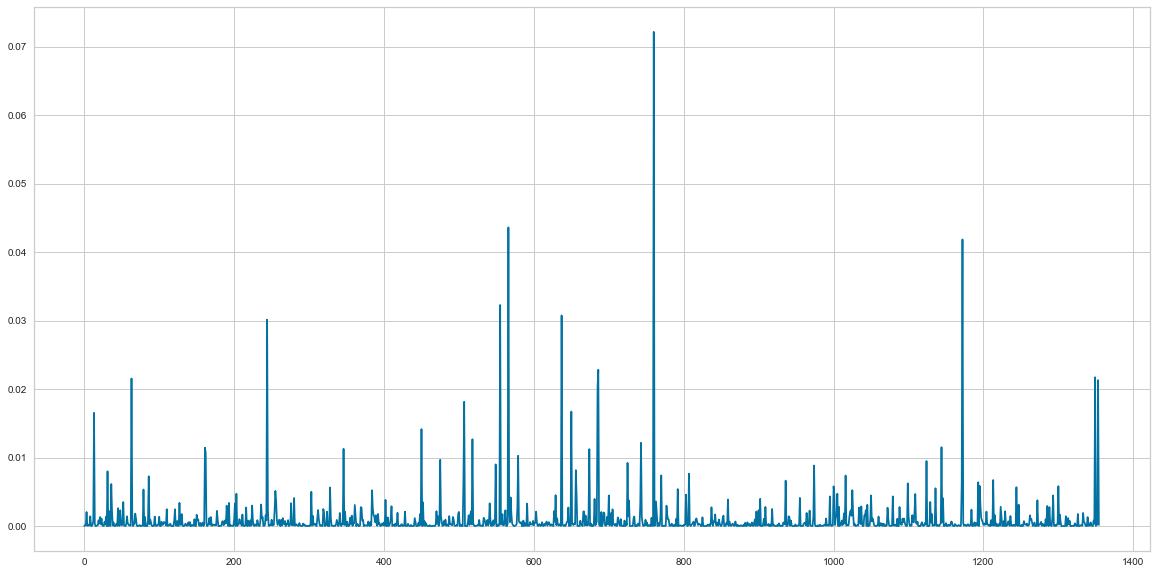

In [16]:
from statsmodels.formula.api import OLS

m = OLS(y_n,X).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()
_, ax = plt.subplots(figsize=(20,10))
plt.plot(sm_fr['cooks_d'])
plt.show()

In [17]:
X_out=X.drop(sm_fr['cooks_d'][sm_fr['cooks_d']>4/len(X)].index)
y_out=y_n.drop(sm_fr['cooks_d'][sm_fr['cooks_d']>4/len(X)].index)

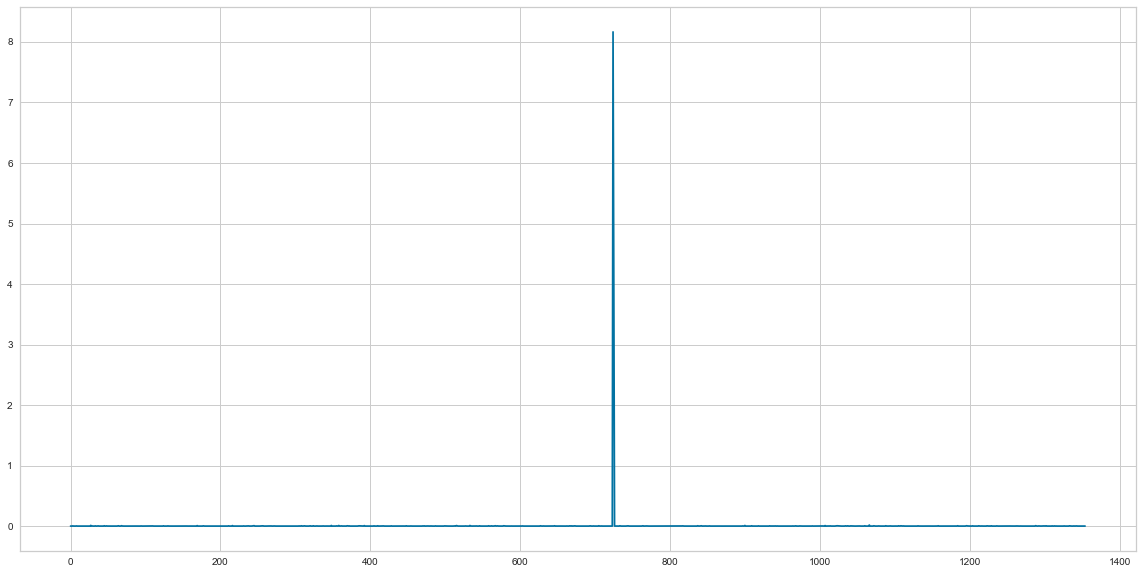

In [18]:
m = OLS(y_out,X_out).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()
_, ax = plt.subplots(figsize=(20,10))
plt.plot(sm_fr['cooks_d'])
plt.show()

In [19]:
X_out=X_out.drop(sm_fr['cooks_d'][sm_fr['cooks_d']>4/len(X)].index)
y_out=y_out.drop(sm_fr['cooks_d'][sm_fr['cooks_d']>4/len(X)].index)

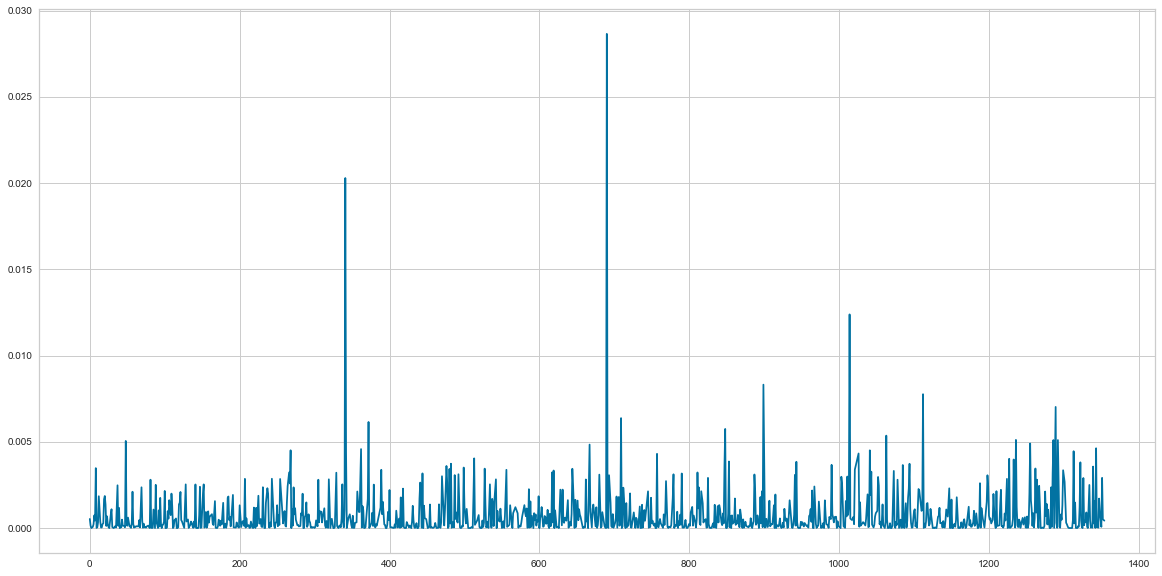

In [20]:
m = OLS(y_out,X_out).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()
_, ax = plt.subplots(figsize=(20,10))
plt.plot(sm_fr['cooks_d'])
plt.show()

In [21]:
X_out.shape

(1176, 64)

### (!) Поработаем с параметрами (корреляционная матрица)

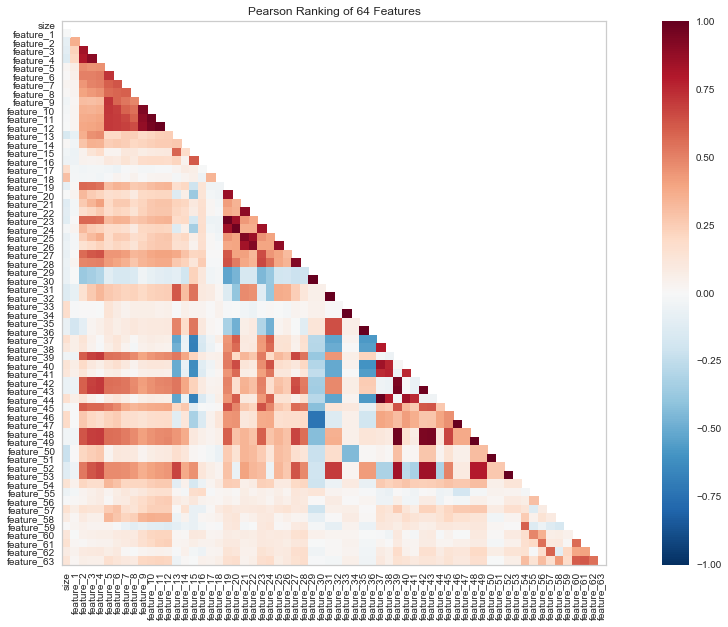

In [22]:
# Посмотрим коллеряционную матрицу
from yellowbrick.features import Rank2D,RFECV
_, ax = plt.subplots(figsize=(20,10))
rank = Rank2D(ax=ax,features=names,algorithm='pearson')
rank.fit(X_out,y_out)
rank.transform(X)
rank.poof()

### (!) Recursive Feature Elimination

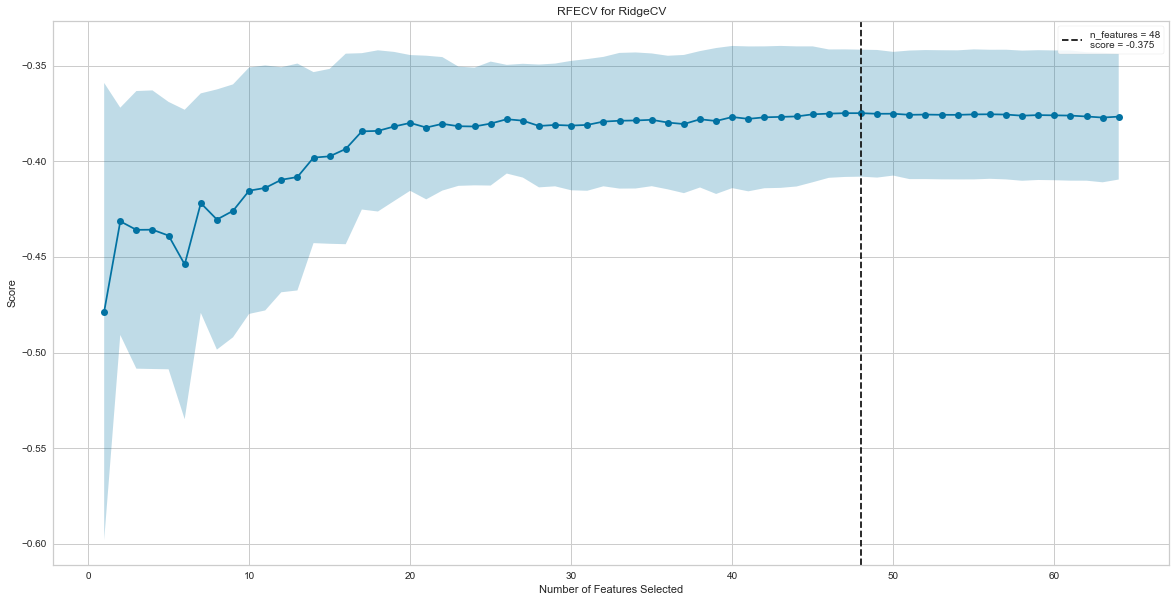

Wall time: 1min 28s


In [23]:
%%time
# Попробуем посмотреть Recursive Feature Elimination
_, ax = plt.subplots(figsize=(20,10))
rfe = RFECV(regressor,cv=cv,scoring=scorer,step=10)
rfe.fit(X_out,y_out)
rfe.poof()

In [24]:
#Сохраним выбранные параметры
params = {
    'parameters': list(X.columns),
    'ranking':list(rfe.ranking_)
}
par = pd.DataFrame(data=params)
huber_params = list(par[par['ranking']==1]['parameters'])

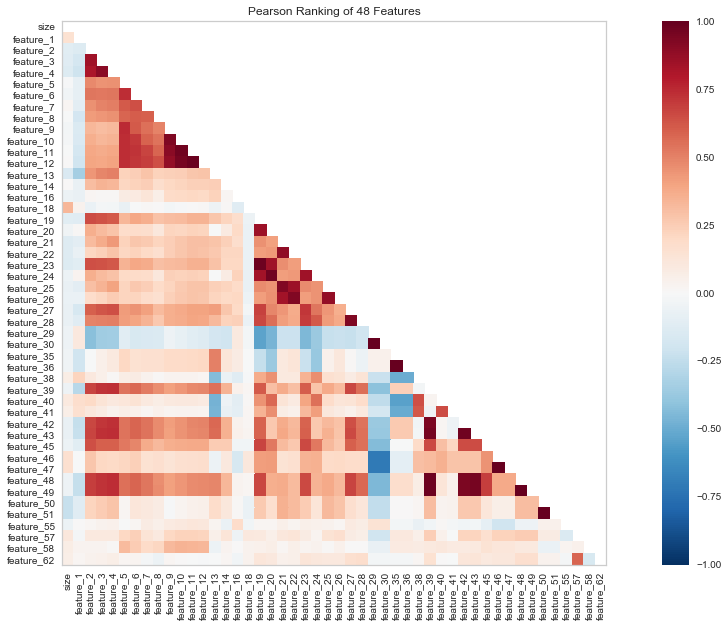

In [25]:
# Посмотрим корреляционную матрицу еще раз
_, ax = plt.subplots(figsize=(20,10))
rank = Rank2D(ax=ax,features=huber_params,algorithm='pearson')
rank.fit(X_out[huber_params],y_n)
rank.transform(X_out[huber_params])
rank.poof()

### (!) Регуляризация

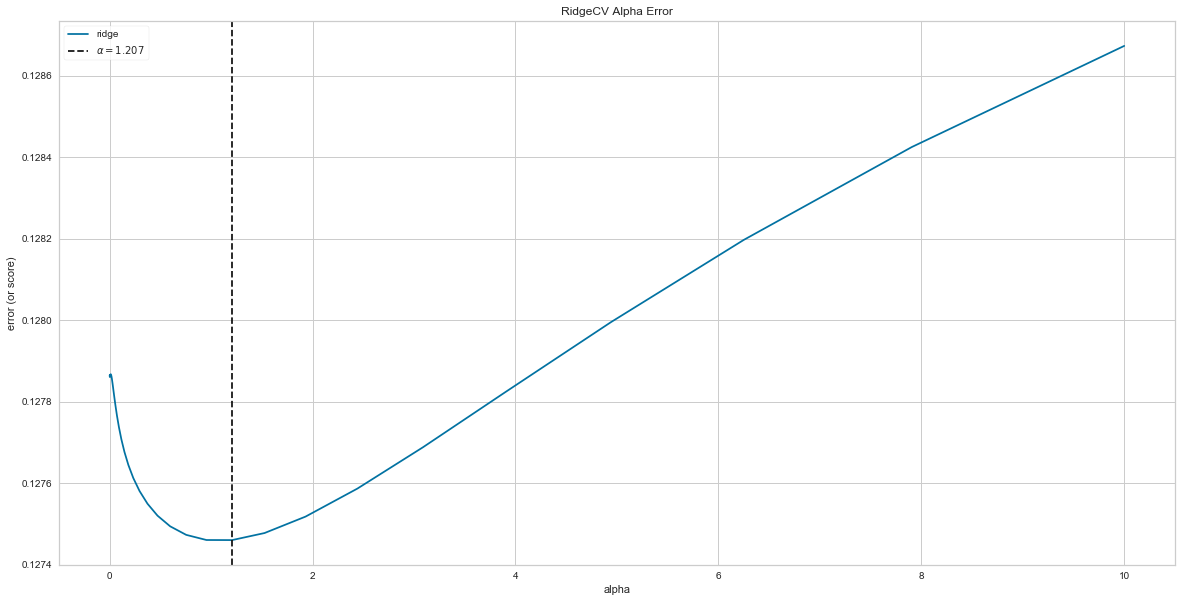

In [26]:
from yellowbrick.regressor import AlphaSelection
_, ax = plt.subplots(figsize=(20,10))
a_select=AlphaSelection(RidgeCV(alphas=alphas))
a_select.fit(X_out[huber_params],y_out)
a_select.poof()

### Посмотрим Learning Curve

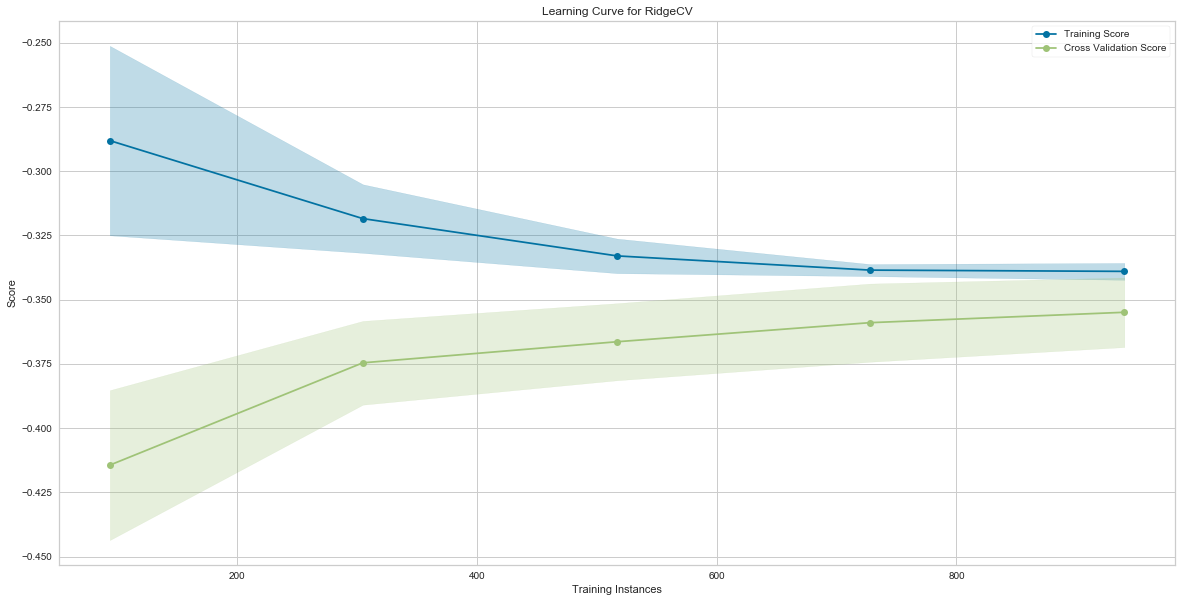

In [27]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.2, 1.0, 5)
_, ax = plt.subplots(figsize=(20,10))
lc = LearningCurve(RidgeCV(alphas=alphas), scoring=scorer,cv=cv)
lc.fit(X_out[huber_params],y_out)
lc.poof()

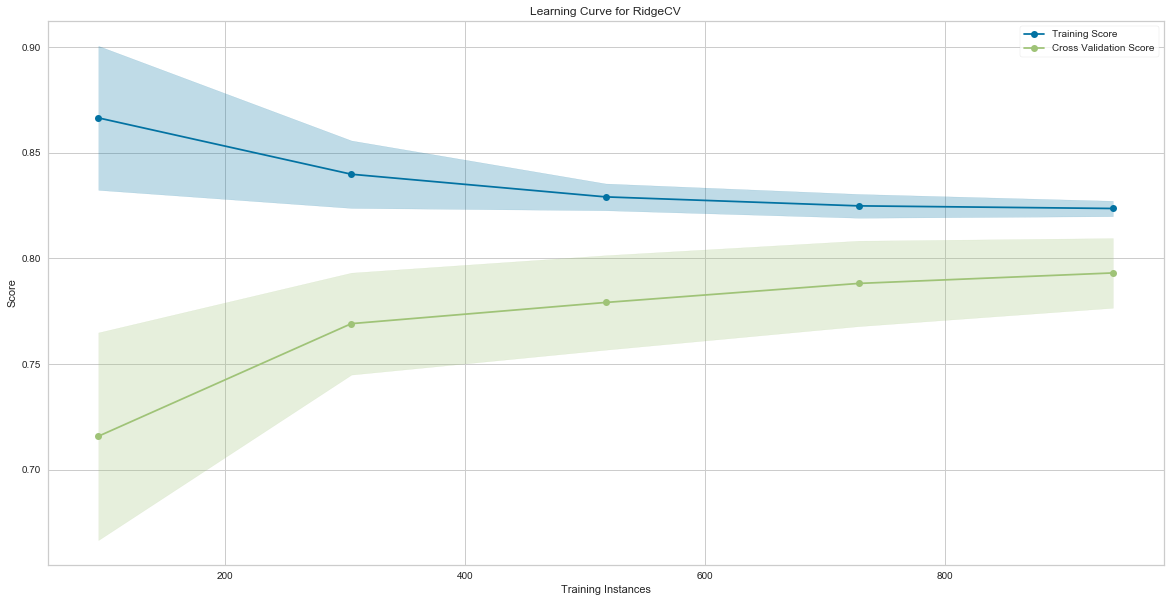

In [28]:
_, ax = plt.subplots(figsize=(20,10))
lc = LearningCurve(RidgeCV(alphas=alphas), scoring='r2',cv=cv)
lc.fit(X_out[huber_params],y_out)
lc.poof()

### Посмотрим, что нам дает обученная модель

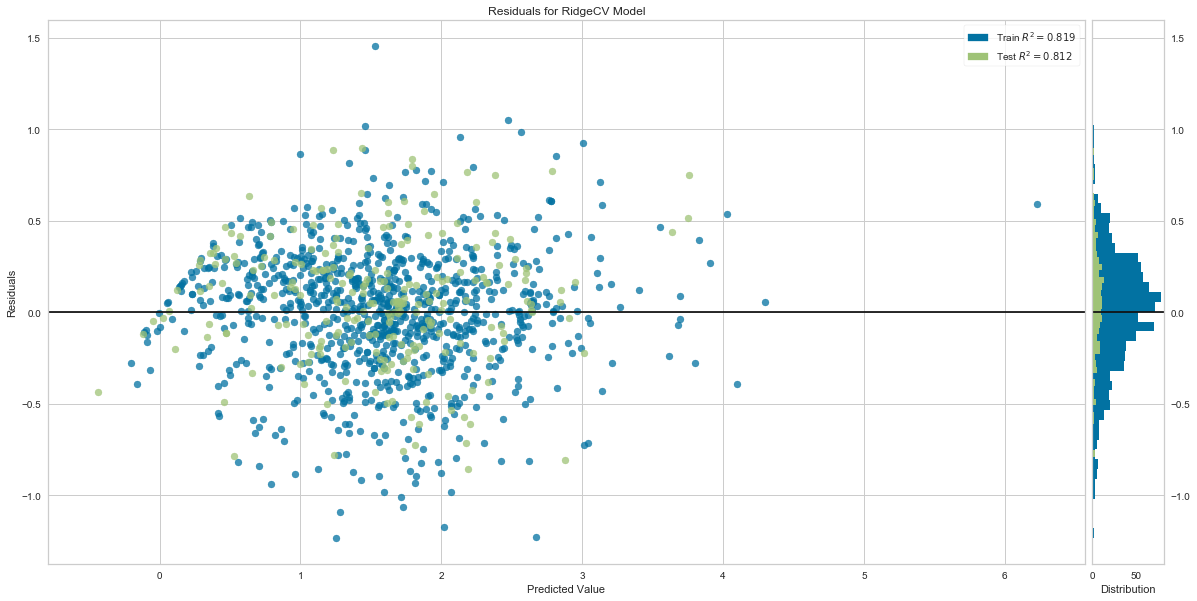

In [29]:
# Смотрим как ведут себя остатки
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot,PredictionError
X_train,X_test,y_train,y_test = train_test_split(X_out[huber_params],y_out,test_size=0.2,random_state=2019)
regressor=RidgeCV(alphas=alphas,cv=cv,scoring=scorer)

_, ax = plt.subplots(figsize=(20,10))
res = ResidualsPlot(regressor)
res.fit(X_train,y_train)
res.score(X_test,y_test)
res.poof()

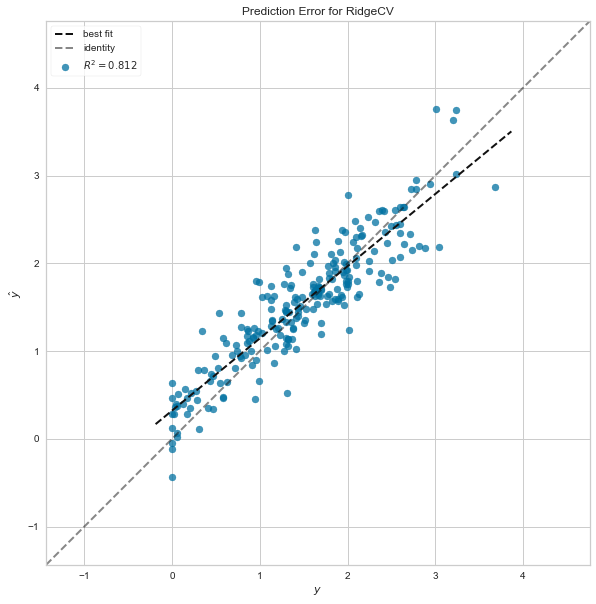

In [30]:
# Смотрим как распределены ошибки
_, ax = plt.subplots(figsize=(20,10))
error=PredictionError(regressor)
error.fit(X_train,y_train)
error.score(X_test,y_test)
error.poof()

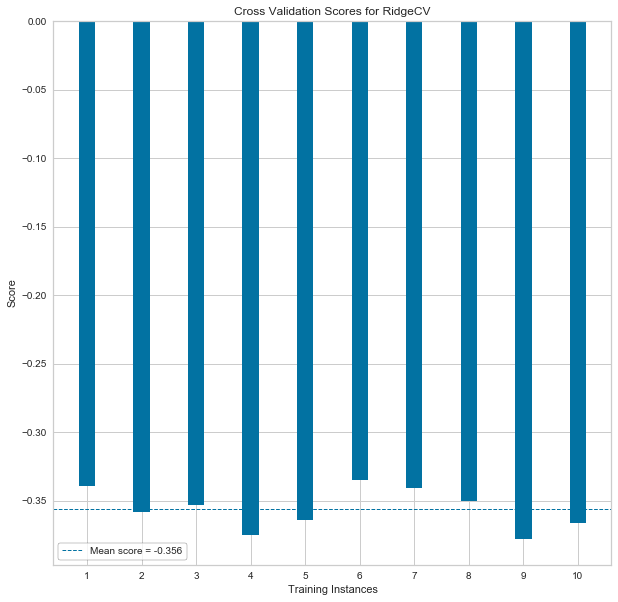

In [31]:
_, ax = plt.subplots(figsize=(10,10))
mse = CVScores(regressor,ax=ax,cv=cv,scoring=scorer)
mse.fit(X_out[huber_params],y_out)
mse.poof()

### В итоге
* R2 ≈ **?**
* ln(RMSE) ≈ **?**